# California Housing Price Prediction

## Problem stament

Accurately predicting house prices is a challenging yet essential task in the real estate industry. Traditional methods often struggle to handle the complexity and variability of real estate data, which includes diverse features such as location, size, number of rooms, and various other factors. This complexity is compounded by issues such as multicollinearity and noise in the data, which can impair the performance of predictive models. Given these challenges, there is a need for an effective approach to preprocess and model real estate data to improve prediction accuracy.

The goal of this project is to develop a robust regression model that can accurately predict house prices by addressing the aforementioned challenges. To achieve this, we trained multiple regression models and selected the best-performing one based on key accuracy metrics. The ultimate goal is to offer a more objective, consistent, and scalable alternative to traditional property valuation methods, thereby improving decision-making processes in the real estate market and benefiting all stakeholders involved in real estate transactions.

## Prepare Data 

<b> Dataset description</b>

For this project we will be working with [California Housing Prices Data (5 new features!)](https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features) which contains the Median house prices for California districts derived from the 1990 census. The columns are as follows, their names are pretty self-explanatory:

1) `Median House Value`: Median house value for households within a block (measured in US Dollars) [$]

2) `Median Income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) `Median Age`: Median age of a house within a block; a lower number is a newer building [years]

4) `Total Rooms`: Total number of rooms within a block

5) `Total Bedrooms`: Total number of bedrooms within a block

6) `Population`: Total number of people residing within a block

7) `Households`: Total number of households, a group of people residing within a home unit, for a block

8) `Latitude`: A measure of how far north a house is; a higher value is farther north [°]

9) `Longitude`: A measure of how far west a house is; a higher value is farther west [°]

10) `Distance to coast`: Distance to the nearest coast point [m]

11) `Distance to Los Angeles`: Distance to the centre of Los Angeles [m]

12) `Distance to San Diego`: Distance to the centre of San Diego [m]

13) `Distance to San Jose`: Distance to the centre of San Jose [m]

14) `Distance to San Francisco`: Distance to the centre of San Francisco [m]





<b> Import the relevant libraries

In [2]:
import warnings

import pandas as pd #woking with data frames
import numpy as np # numeric operations
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #advanced visualisation

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.model_selection import train_test_split #model split
from sklearn.metrics import mean_squared_error, r2_score #evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

warnings.simplefilter(action="ignore", category=FutureWarning)

<b> Load the dataset

In [3]:
#load the dataframe
df = pd.read_csv("California_Houses.csv")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


<b>Explore the dataset

In [4]:
df.shape

(20640, 14)

The dataset consists of 20640 observations and 14 columns.

In [5]:
# get the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


We can see that the house value ranges from `$14K`  to  `500K` Dollars, with a mean of `$206K `and standard deviation of `$115K`.

In [6]:
# get an overview of the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

All the columns in the dataset contain numeric data. This will save us some of the preprocessing steps!

Lets check for any missing values in our dataset

In [7]:
#check for missing values in the df
df.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

Boom! None of the columns contain missing values.

### Data Preprocesssing

We want to explore the relationship between the feature variables and the `median_house_value`, as that could help you gain insight on factors which determine the house value. We can model the relationship using linear regression. To do this, we want to check if the model assumptions for linear regression can be made in this context. 

<b> Checking forthe assumption of Linearity 

Before we can use a linear model to predict housing prices, it's crucial to ensure that the data meets the assumption of linearity. This means that the relationship between each feature and the target variable should be linear, such that a change in the target variable due to a one-unit change in the feature is constant, regardless of the feature's value.

If we fit a regression model to a dataset that does not exhibit linear relationships, the model will fail to adequately capture the true relationship between the features and the target variable, resulting in an inaccurate and inappropriate model.

To check for linearity, we will produce scatter plots of each feature against the target variable. These scatter plots will help us visually assess whether there is a linear relationship between the features and the target variable. Ideally, we should observe a clear linear trend in these plots, indicating that the assumption of linearity is met.

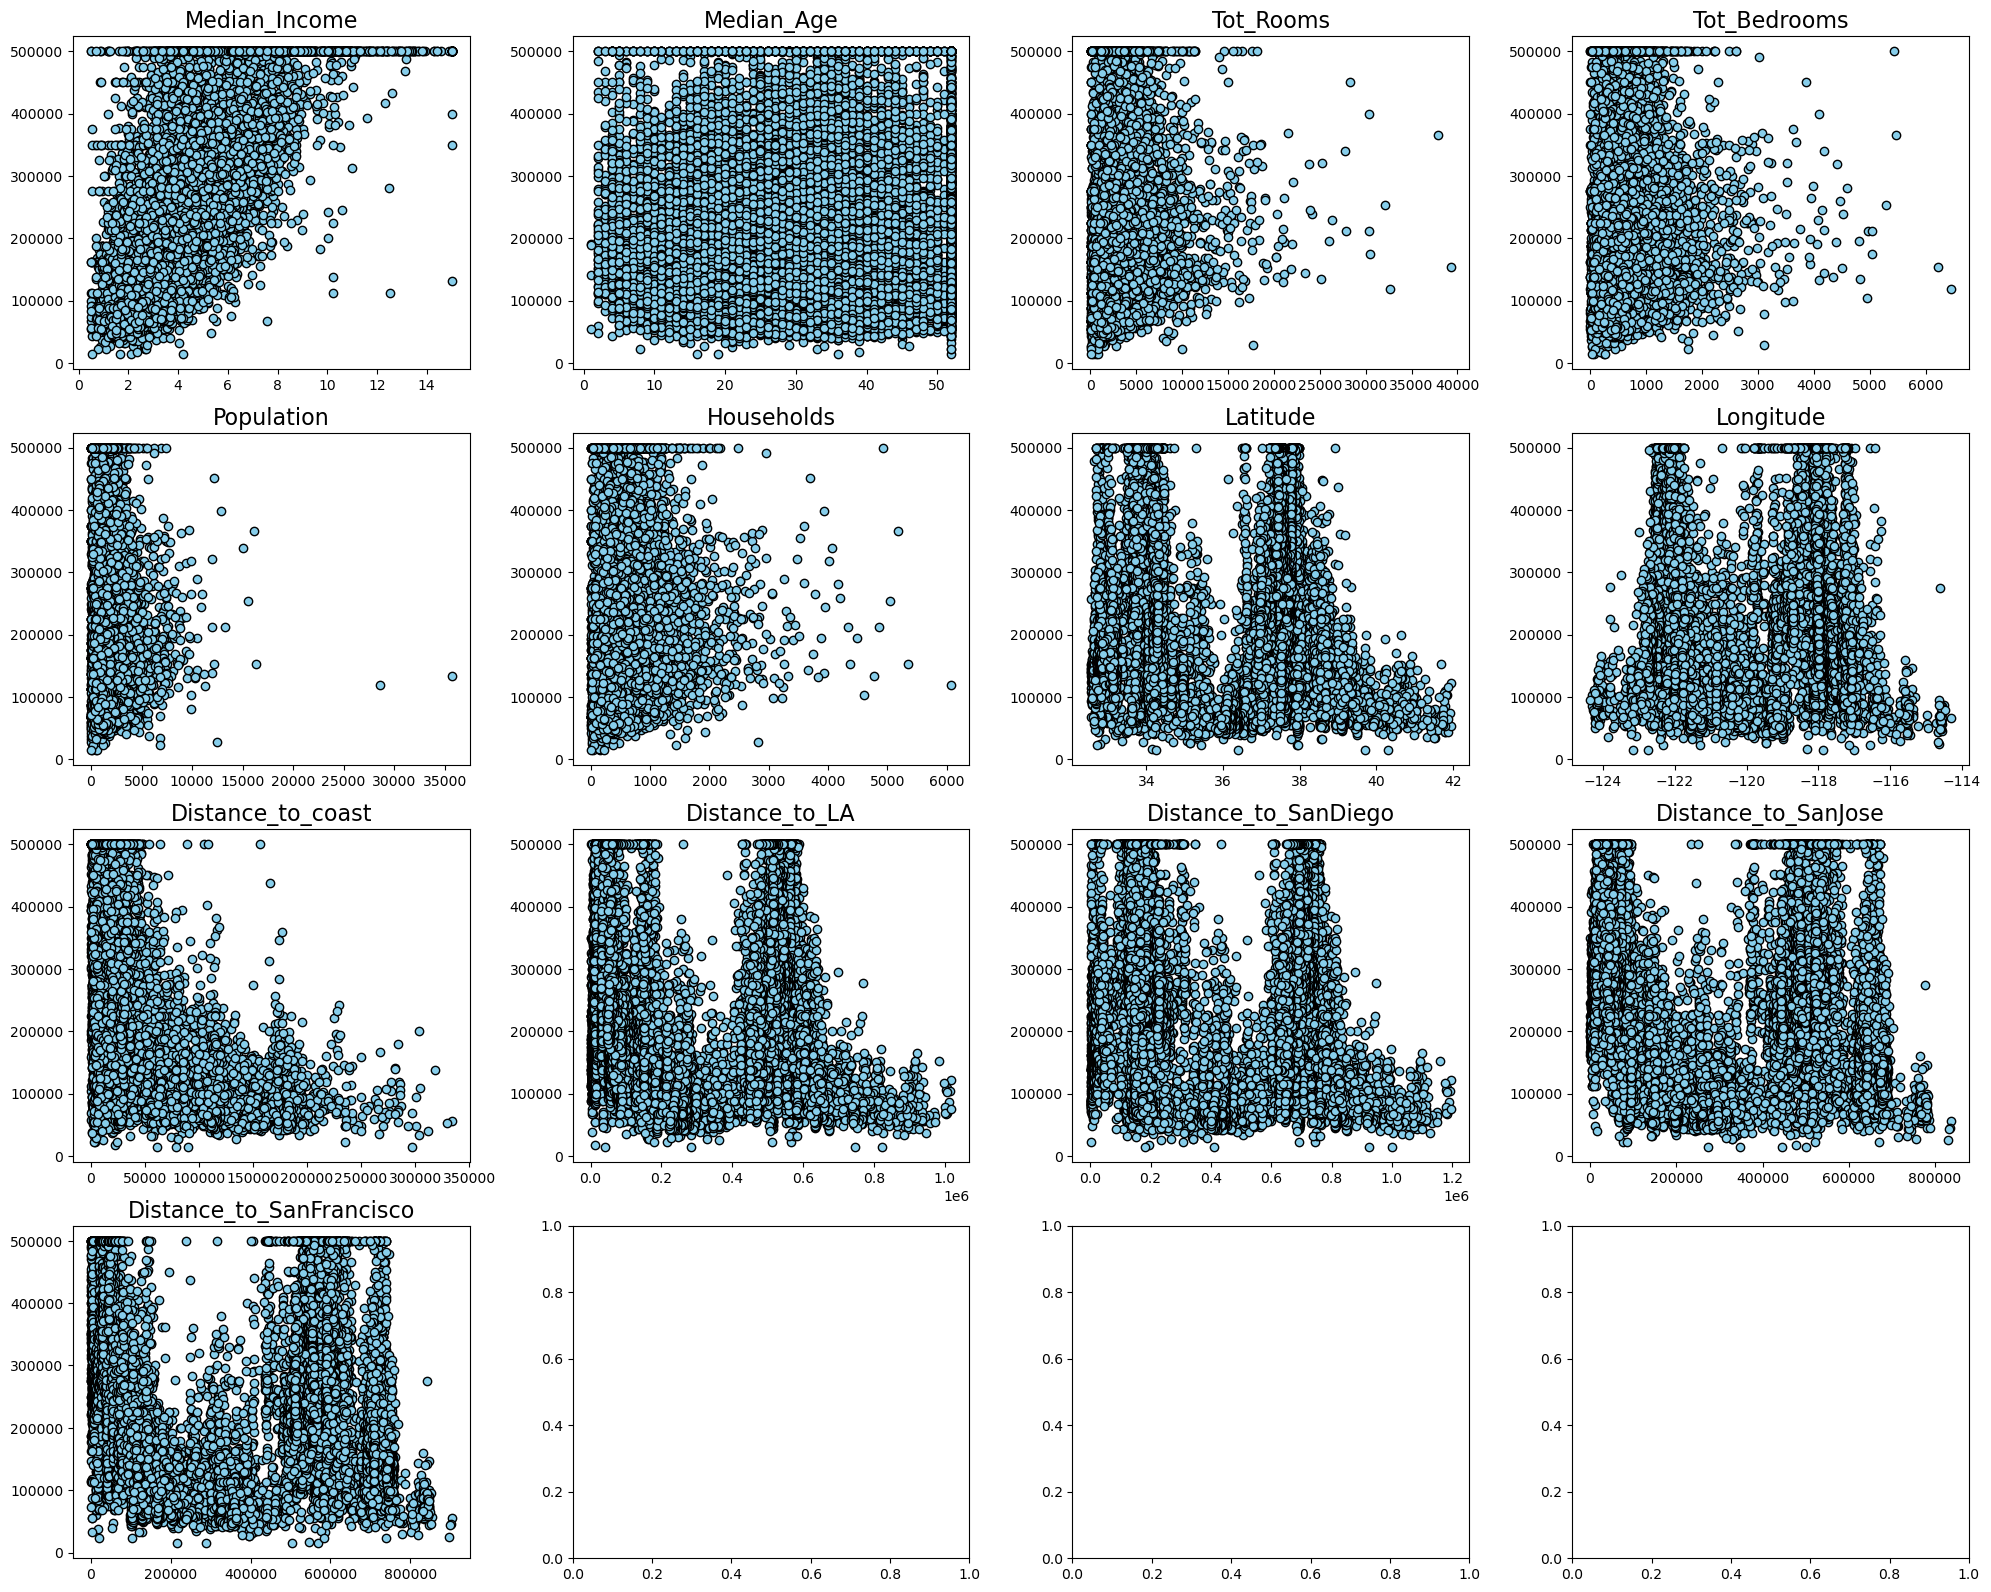

In [8]:
# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axs = axs.ravel()

# Exclude the house value from the features
df1 = df.drop(columns='Median_House_Value')

# Plot each feature against the Median_House_Value
for index, column in enumerate(df1.columns):
    axs[index].set_title("{}".format(column), fontsize=16)
    axs[index].scatter(x=df[column], y=df['Median_House_Value'], color='skyblue', edgecolor='k')

# Adjust layout
fig.tight_layout(pad=1)
plt.show()

From these scatter plots, it is evident that not all features have a strong linear relationship with the target variable (`median house value`). Particularly, median income shows a positive linear relationship, but other features do not exhibit clear linearity.

<b>Checking for Normality 

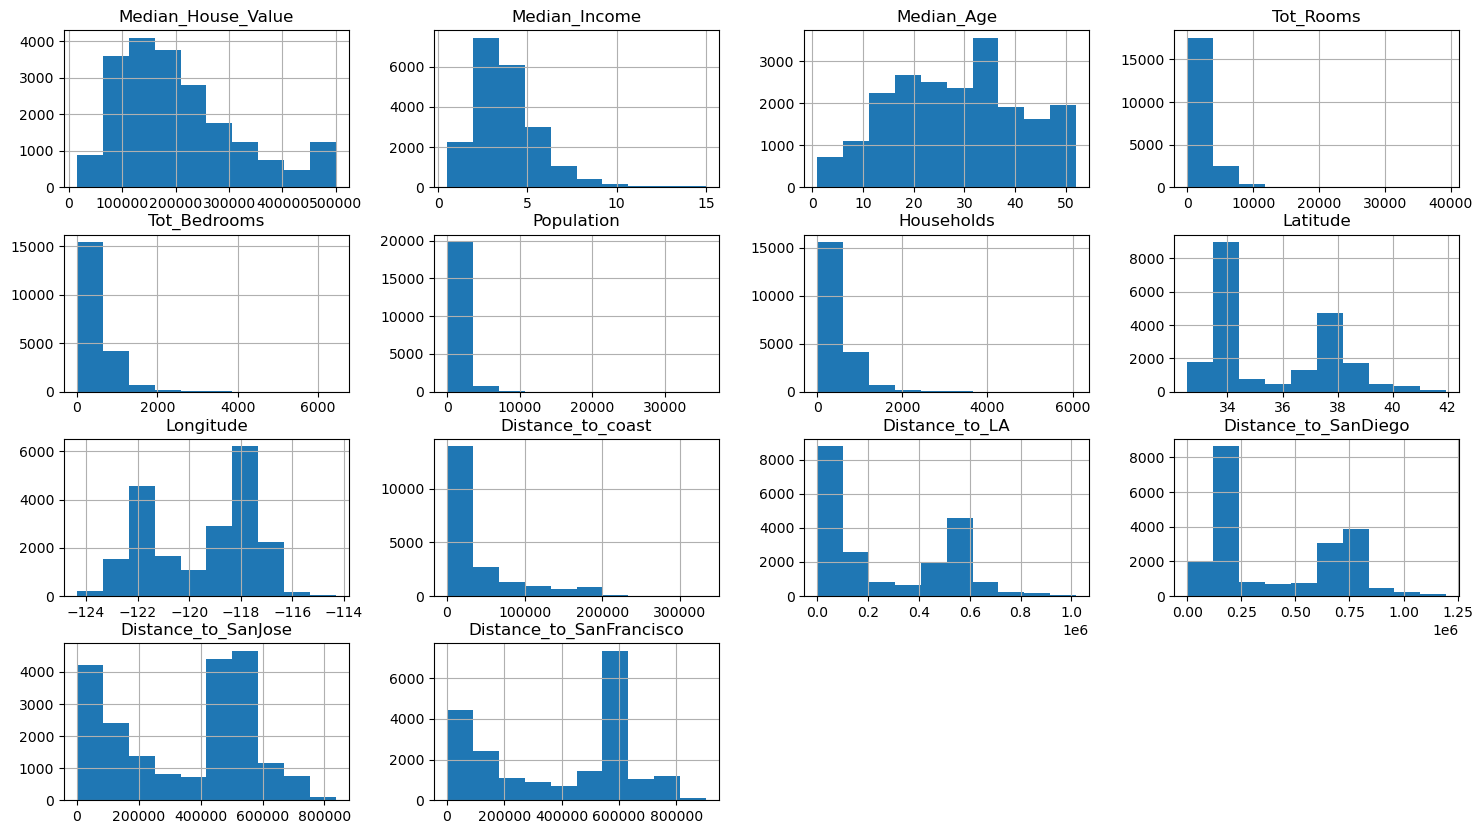

In [9]:
#plot the distribution of the data
df.hist(figsize=(18,10))
plt.show()

* The histogram for `median_age` shows a more uniform distribution with several peaks, suggesting that the ages of houses are spread out across different values.
* The histograms for `tot_rooms`, `population`, `households`, `median_income`, `median_house_value` , `distance_to_coast` and `tot_bedrooms` is positively skewed/ right skewed,  this suggests the presence of outliers in the dataset.
* The histograms for `longitude` and `latitude`shows a bimodal distribution, which might suggest two geographic clusters within the dataset.
* The histograms for `Distance_to_LA`, `Distance_to_SanDiego` ,`Distance_to_SanJose`, `Distance_to_SanFrancisco` shows bimodal distribution, indicating two distinct clusters of data points at different distances. One cluster is closer, while the other is farther away.

For the features that are are skewed we can perform `Log Transformation` on them.

In [10]:
#Log transformation of positively skewed features

df['Median_House_Value'] = np.log(df['Median_House_Value'])
df['Tot_Rooms'] = np.log(df['Tot_Rooms'])
df['Tot_Bedrooms'] = np.log(df['Tot_Bedrooms'])
df['Population'] = np.log(df['Population'])
df['Households'] = np.log(df['Households'])
df['Median_Income'] = np.log(df['Median_Income'])
df['Distance_to_coast'] = np.log(df['Distance_to_coast'])

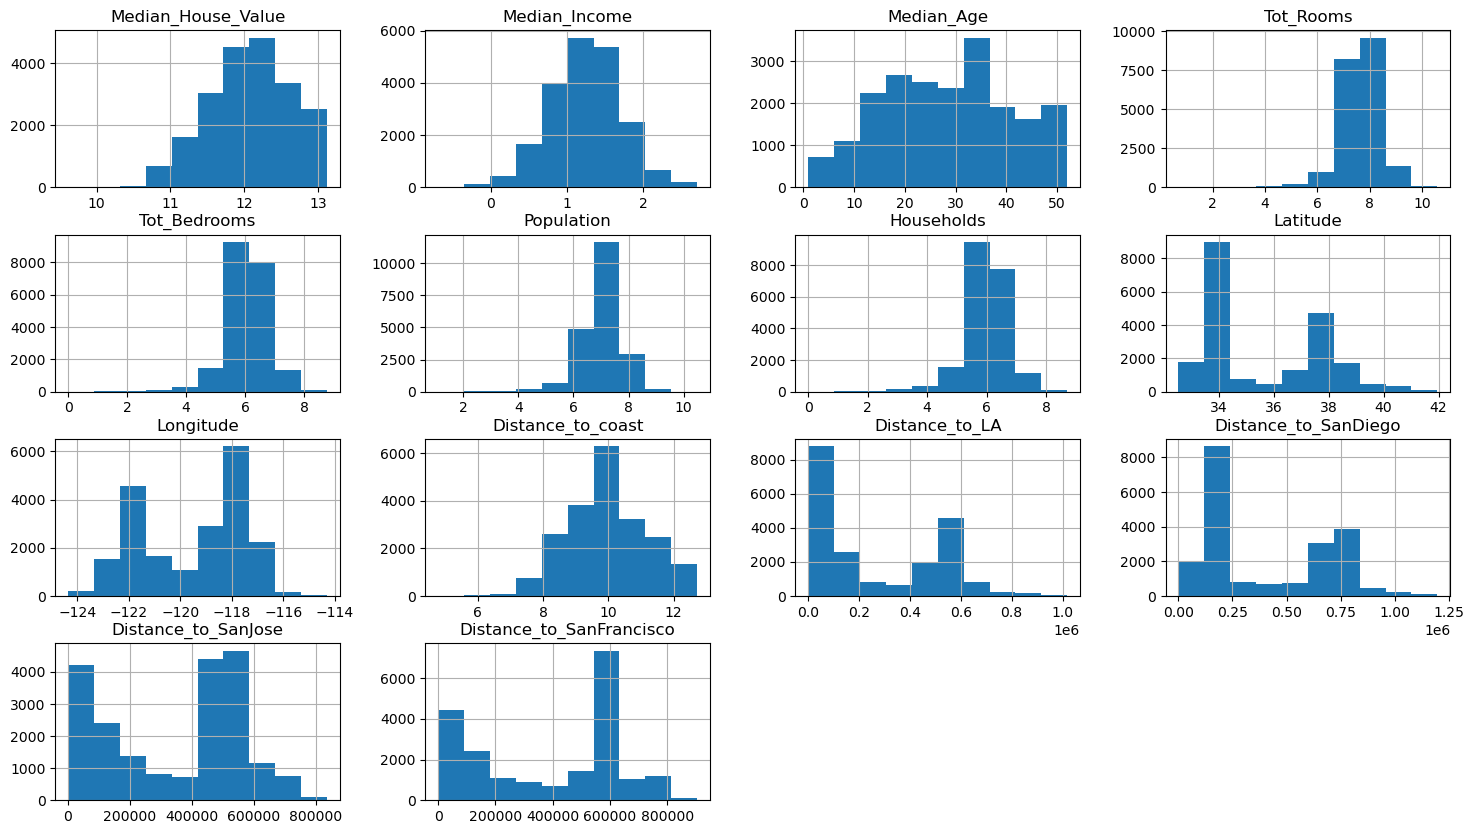

In [11]:
#plot the distribution of the data
df.hist(figsize=(18,10))
plt.show()

Log transformations has ensured that the skewed column are now exhibiting a Gaussian distribution.

<b>Checking for multicollinearity between the Features

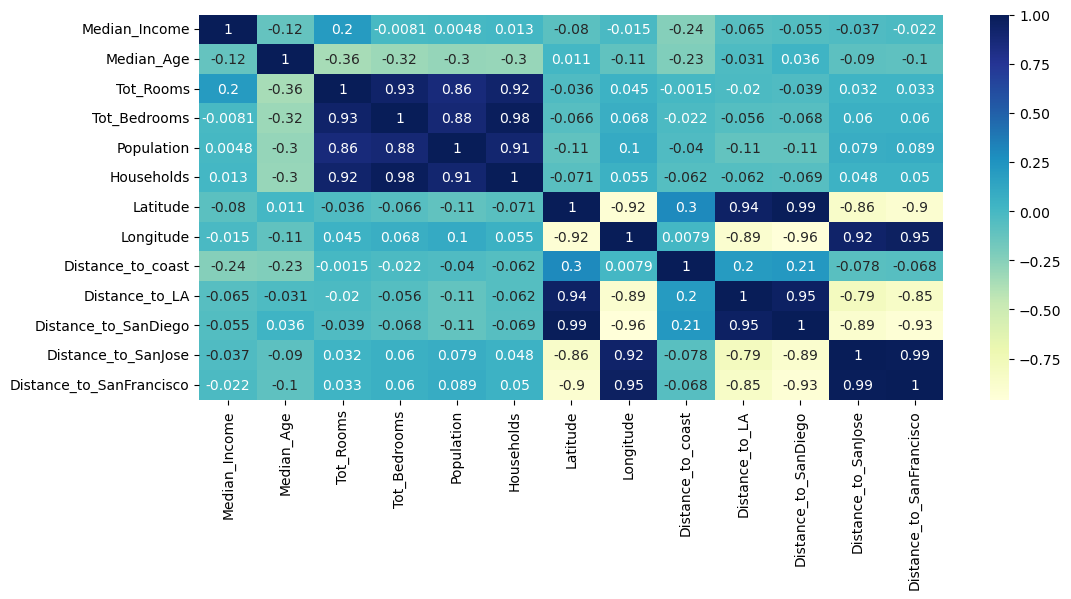

In [12]:
#plot the heatmap for the correlation
plt.figure(figsize=(12,5))
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu')
plt.show()

* The `tot_rooms` has high positive correlation with `Households`, `Population`, `Tot_Bedrooms`
* The `Tot_Bedrooms` has high positive correlation with `Households`, `Population`, `tot_rooms`
* The `Population` has high positive correlation with `Households`,  `Tot_Bedrooms`, `tot_rooms`
* The  `Households` has high positive correlation with, `Population`, `Tot_Bedrooms`, `tot_rooms`
* The `Latitude` has high positive correlation with `Distance_to_LA`,  `Distance_to_SanDiego`, and high negative correlattion with `Longitude`, `Distance_to_SanJose`, `Distance_to_SanFrancisco`
* The `Longitude` has high positive correlation with `Distance_to_SanFrancisco` ,`Distance_to_SanJose`, and high negative correlattion with `Latitude`, `Distance_to_SanDiego`, `Distance_to_LA`

Multicollinearity can significantly impact regression models by inflating the variance of coefficient estimates, resulting in unreliable and unstable predictions. To mitigate this, we can drop columns that have high multicollinearity but are less correlated with our target variable, which in this case is the median house value.

In [13]:
#create list of correlated columns
collinear_cols = ['Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_LA', 'Distance_to_SanDiego','Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = 'Median_House_Value'

# Calculate the correlation coefficients
correlation_with_target = df[collinear_cols + [target]].corr()[target]
correlation_with_target[:-1].sort_values()

Latitude                   -0.192596
Distance_to_LA             -0.174126
Distance_to_SanDiego       -0.136793
Longitude                  -0.023209
Distance_to_SanJose        -0.017556
Distance_to_SanFrancisco   -0.005725
Population                  0.026401
Tot_Bedrooms                0.088201
Households                  0.113177
Tot_Rooms                   0.186177
Name: Median_House_Value, dtype: float64

### Feature Selection 
Based on the correlation analysis with our target variable, it is advisable to retain features that exhibit higher correlations with the target and remove features that, although highly correlated with these retained features, show lower correlations with the target. Therefore, we will keep `Tot_Rooms`, `Latitude`, and `Longitude`, and drop other columns that contribute to multicollinearity.

In [14]:
#drop columns that constitute multicollinearity
df.drop(columns=[col for col in collinear_cols if col not in ['Tot_Rooms','Latitude', 'Longitude']], inplace=True)

<b>Separate the features from target variable

In [15]:
#features 
X = df.drop(columns=target)

#target variable 
y = df[target]

### Train test split

In [16]:
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

Scale the features so that larger values do not have dorminance over the training of the model 

In [17]:
#create a scaler object 
scaler = StandardScaler()

#scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

We will train multiple regression models and choose the best performing regressor for our final model.

In [18]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'xgb': XGBRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = {'MSE': mse, 'R2': r2}

### Evaluate Performance

In [45]:
# Print model performance
for model_name, metrics in model_performance.items():
    print(f"{model_name} - MSE: {round(metrics['MSE'],2)}, R2: {round(metrics['R2'], 2)}")

Linear Regression - MSE: 0.12, R2: 0.63
Ridge Regression - MSE: 0.12, R2: 0.63
Decision Tree - MSE: 0.1, R2: 0.68
Random Forest - MSE: 0.05, R2: 0.84
Gradient Boosting - MSE: 0.07, R2: 0.78
xgb - MSE: 0.05, R2: 0.84
SVR - MSE: 0.08, R2: 0.76
KNN - MSE: 0.09, R2: 0.72


Linear Regression and Ridge Regression both yielded identical results with an R² of 0.6343 and an MSE of 0.12, indicating moderate predictive power. Decision Tree performed slightly better with an R² of 0.6848 and an MSE of 0.1. Gradient Boosting and SVR also showed improved performance, with R² scores of 0.7818 and 0.7569, respectively. 

However, the standout models were `Random Forest` and `XGBoost`, both achieving the lowest MSE of 0.05 and the highest R² scores, with XGBoost slightly outperforming Random Forest at 0.83932 versus 0.83925. 

We will use the `xgb regressor` model since it has the best performance of all the models.

### Model selection and hyperparameter tuning

We perform hyperparameter tuning for the model to find the optimal set of parameters to improve the performance of our model.

In [20]:
#instantiate the regressor
xgb = XGBRegressor()

param_grid = [{'n_estimators':[100,300,400], 'max_depth':[4,5,6],'learning_rate':[0.1,0.3,0.5],
              'colsample_bylevel':[0.7,1]}]
              
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, 
                                   n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'colsample_bylevel': [0.7, 1],
                          'learning_rate': [0.1, 0.3, 0.5],
                          'max_depth': [4, 5, 6],
                          'n_estimators': [100, 300, 400]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
#print the best parameters for the model 
grid_search.best_params_

{'colsample_bylevel': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 400}

In [22]:
#Train the model with the best parameter set
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 400, colsample_bylevel=0.7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
#Generate model prediction
predictions = xgb.predict(X_test)

#Evaluate performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse.round(3)}")
print(f"R-squared: {r2.round(2)}")

MSE: 0.049
R-squared: 0.85


 X_train.columns* The Mean Squared Error of 0.049 indicates that, on average, the squared differences between the predicted and actual housing prices are quite small. This low MSE suggests that the model's predictions are close to the actual values.
* R²: An R-squared value of 0.85 means that the model explains 85% of the variance in housing prices. This indicates a strong performance, as the model captures a significant portion of the variability in the target variable.

In [43]:
# Get feature importances
features = X.columns
importance = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Median_Income,0.414373
5,Distance_to_coast,0.319406
3,Latitude,0.111119
4,Longitude,0.088678
1,Median_Age,0.037388
2,Tot_Rooms,0.029036


## Communicate Result

Now let’s convert our predictions back to Dollars and see how good our model is:

In [41]:
##get the actual values
y_test = y_test


#change the values back to the original format
actual = np.exp(y_test)
model_pred = np.exp(predictions)

#Obtain the values in the original scale
mse = mean_squared_error(actual, model_pred)
rmse = np.sqrt(mse)

print(rmse)

46624.51666686895


An error of about `$47K` is good considering the range of our `median_house_value` is from `$149k` to `$500K`.

Let’s look at the distribution of our predicted prices and the actual prices



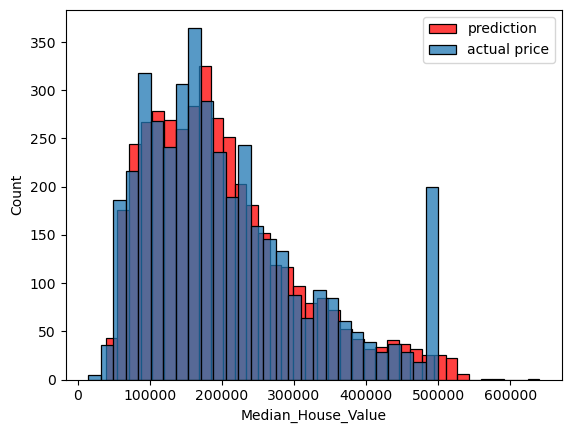

In [42]:
#distribution of actual and predicted prices
sns.histplot(model_pred, label='prediction',color='red')
sns.histplot(actual, label='actual price')
plt.legend()

We can see that our model was good at estimating the median house prices.

For this project, I used the Xgboost regressor to predict the median housing prices in Carlifornia. It showed excellent performance by having a root mean squared error of 47K dollars.

## Conclusion

With this project, we have built a robust model that can predict housing prices with a high degree of accuracy. This information is invaluable for real estate companies and individual homeowners looking to assess property values. The art of property pricing is traditionally complex and often handled by experts, but by leveraging historical data and machine learning techniques, we can achieve results that rival expert valuations.

Understanding these patterns through our model provides a significant advantage in the real estate market, whether for pricing properties competitively when selling or making informed purchasing decisions. The predictive insights from this model empower stakeholders to make data-driven decisions with greater confidence.